# Rotation periodogram

## Rotation period from periodogram
Let's try to estimate the stellar rotation period from a TESS [(Ricker et al. 2014)](https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..20R/abstract) light curve of TOI-640 [(Knudstrup et al. 2023)](https://ui.adsabs.harvard.edu/abs/2023A%26A...671A.164K/abstract) (the transits have been removed). 

As before we'll first read in the data and fill gaps (TESS downlinks). For this one we do not to filter the light curve, but for others we might have to.

/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/emilkn/anaconda3/envs/main/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


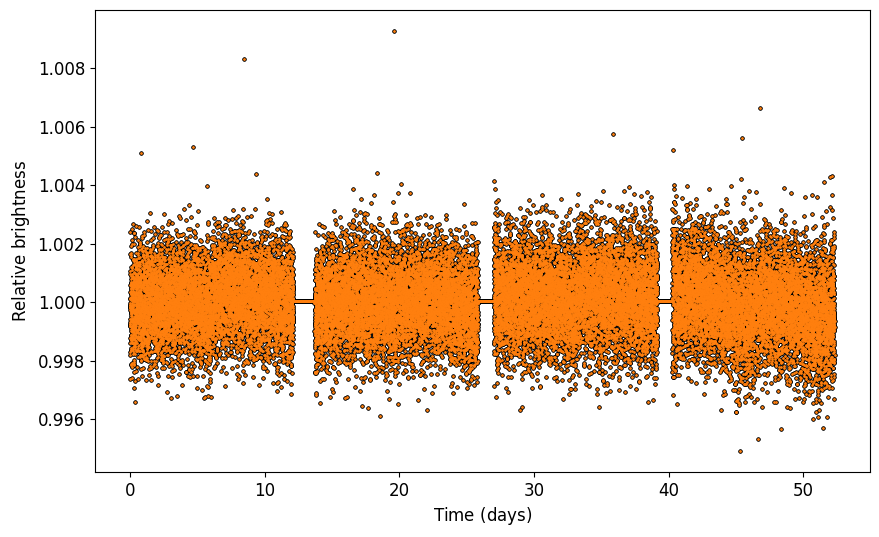

In [1]:
import coPsi
## Instantiate Data
dat = coPsi.Data()
## Read in data file
dat.readData('lc_toi640_2min.txt')
## Plot the data and return the axis
ax = dat.plotData(return_ax=1)
## Apply a Savitsky-Golay filter, if needed (not the case here)
sgfilter = 0
if sgfilter:
    dat.filterData(window=12001)
    ## Plot on the same axis to compare
    dat.plotData(ax=ax)

## Maximum period to search for
maxP = 13

## Fill the gaps (here for TESS downlink)
dat.fillGaps()
dat.plotData(ax=ax)

Now that we have a decent looking light curve, we'll try to estimate the stellar rotation period by again first calculating the ACF, but then instead we'll look at the periodogram and fit a gaussian to find the rotation period.

 Long gaps might make peaks appear far from any reasonable values.
Fit Gaussian to periodogram:
Prot = 6.3327+/-0.5079 d


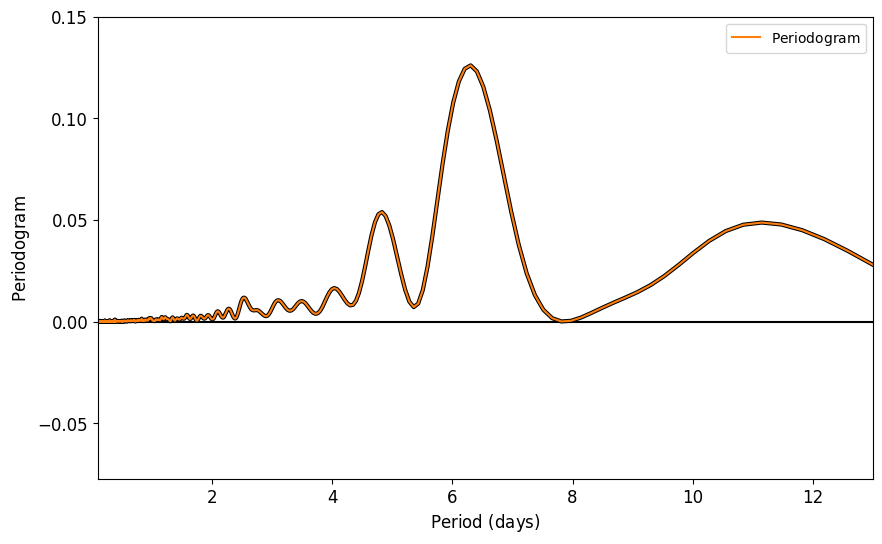

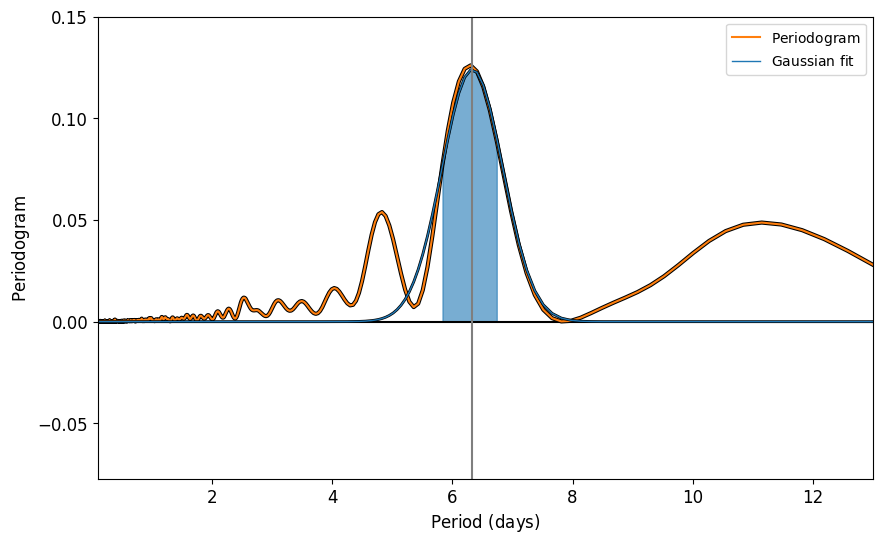

In [2]:
## Instantiate Rotator object, here it inherits from the Data attributes
rot = coPsi.Rotator(x=dat.x,y=dat.y)
## Calculate autocorrelation
rot.ACF()
## Calculate periodogram from autocorrelation
rot.periodogram(maxT=maxP)
## Plot periodogram
rot.plotPeriodogram(xmax=maxP,xmin=0.1,ymax=0.15)
## Fit a Gaussian to the periodogram
rot.fitProt()
## Plot the fit
rot.plotPeriodogram(xmax=maxP,xmin=0.1,ymax=0.15)

As Rotator inherits from Data, we can also read in the data and fill gaps using Rotator.

 Long gaps might make peaks appear far from any reasonable values.
Fit Gaussian to periodogram:
Prot = 6.3327+/-0.5079 d


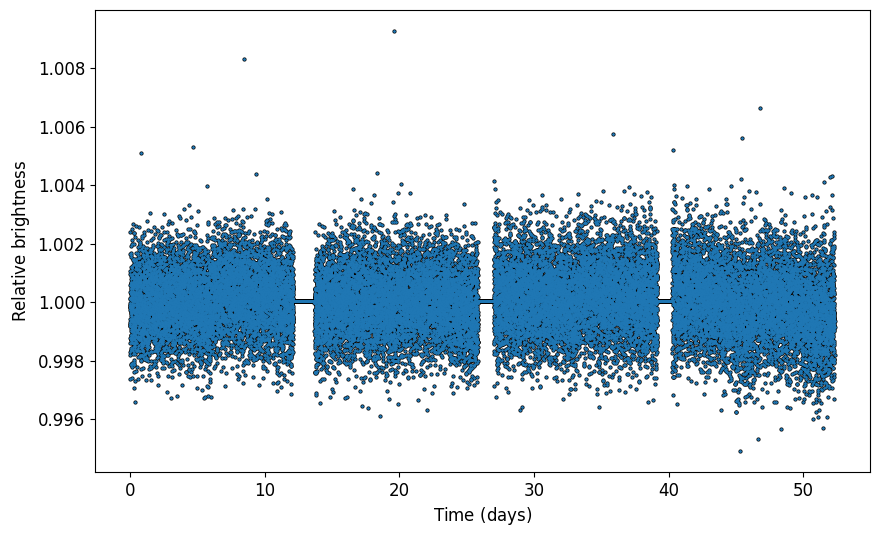

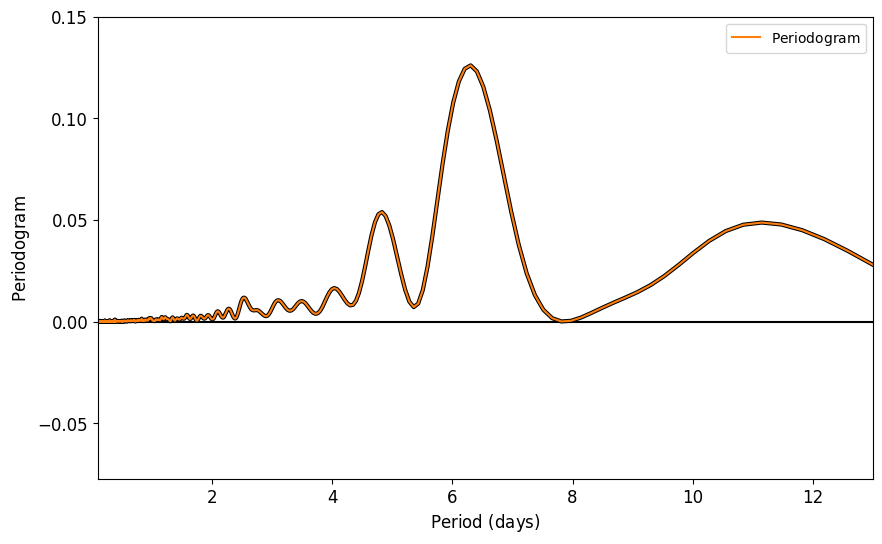

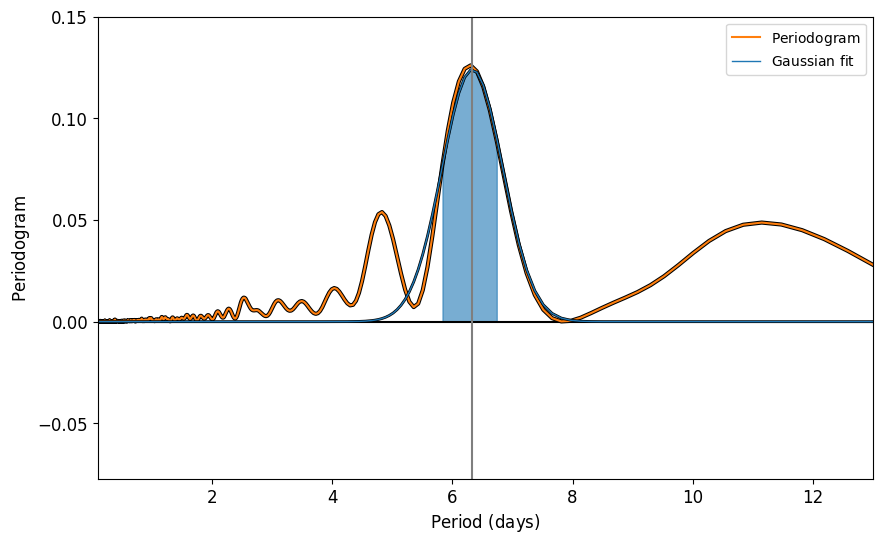

In [3]:
## Read in data directly in Rotator
rot = coPsi.Rotator('lc_toi640_2min.txt')
## Fill gaps
rot.fillGaps()
## and plot
rot.plotData()
## Calculate autocorrelation
rot.ACF()
## Calculate periodogram from autocorrelation
rot.periodogram(maxT=maxP)
## Plot periodogram
rot.plotPeriodogram(xmax=maxP,xmin=0.1,ymax=0.15)
## Fit a Gaussian to the periodogram
rot.fitProt()
## Plot the fit
rot.plotPeriodogram(xmax=maxP,xmin=0.1,ymax=0.15)